# Custom Transaction analysis and total price prediction

# Importing Dependency

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [41]:
df=pd.read_csv(r"C:\Users\hp\Documents\Custom_Business_Data_1.csv")
df

,Transaction_ID,Date,Customer_ID,Customer_Age,Customer_Gender,Product_ID,Product_Category,Product_Price,Quantity,Discount (%),Payment_Method,Store_Location,Employee_ID,Sales_Channel,Advertising_Cost,Profit_Margin (%),Return_Status,Customer_Satisfaction,Annual_Income,Total_Price
0,T000001,7/15/2020,C5353,44,Female,P251,Home Decor,97.92,9.0,13,Card,Phoenix,E886,Online,201.71,17.0,Yes,4,88603.08,766.71
1,T000002,9/5/2023,C3613,22,Male,P98,Groceries,256.51,18.0,42,Online,Los Angeles,E197,Online,832.03,19.0,No,5,59471.08,2677.96
2,T000003,11/26/2023,C9123,23,Female,P97,Home Decor,344.73,15.0,10,Cash,Los Angeles,E820,Online,572.93,14.0,Yes,3,21233.58,4653.86
3,T000004,1/20/2020,C3513,32,NaN,P288,Home Decor,381.69,9.0,1,Online,Houston,E528,Online,877.07,24.0,Yes,1,93874.56,3400.86
4,T000005,9/9/2020,C1966,22,NaN,P172,Groceries,448.53,3.0,5,Online,Phoenix,E599,Online,737.03,25.0,Yes,4,61922.69,1278.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,T049996,7/14/2023,C3369,29,Female,P61,Home Decor,422.05,4.0,43,Cash,Chicago,E620,Online,221.71,16.0,Yes,5,76690.01,962.27
49996,T049997,6/13/2022,C6722,69,Female,P61,Electronics,138.13,16.0,30,Card,Phoenix,E516,Online,927.11,27.0,No,1,26488.32,1547.06
49997,T049998,11/17/2022,C1393,43,Male,P409,Home Decor,456.88,4.0,1,Cash,Phoenix,E708,In-Store,744.22,13.0,No,2,40527.62,1809.24
49998,T049999,3/8/2021,C1803,64,Female,P149,Home Decor,303.99,15.0,40,Card,Houston,E338,Online,830.27,18.0,No,2,27967.03,2735.91


In [43]:
# no.of rows and columns
df.shape

(50000, 20)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction_ID         50000 non-null  object 
 1   Date                   49829 non-null  object 
 2   Customer_ID            50000 non-null  object 
 3   Customer_Age           50000 non-null  int64  
 4   Customer_Gender        49973 non-null  object 
 5   Product_ID             49969 non-null  object 
 6   Product_Category       50000 non-null  object 
 7   Product_Price          49954 non-null  float64
 8   Quantity               49991 non-null  float64
 9   Discount (%)           50000 non-null  int64  
 10  Payment_Method         49983 non-null  object 
 11  Store_Location         50000 non-null  object 
 12  Employee_ID            49946 non-null  object 
 13  Sales_Channel          50000 non-null  object 
 14  Advertising_Cost       49982 non-null  float64
 15  Pr

In [47]:
df.describe()

,Customer_Age,Product_Price,Quantity,Discount (%),Advertising_Cost,Profit_Margin (%),Customer_Satisfaction,Annual_Income,Total_Price
count,50000.000000,49954.000000,49991.000000,50000.000000,49982.000000,49993.000000,50000.000000,49970.000000,50000.000000
mean,43.465460,253.164966,10.005741,24.496220,500.731548,16.952613,3.005640,55024.029386,1908.389436
std,14.978456,143.019396,5.482576,14.455561,286.642482,7.223639,1.415927,25953.448234,1683.646286
min,18.000000,5.000000,1.000000,0.000000,0.020000,5.000000,1.000000,10000.280000,3.120000
25%,31.000000,130.382500,5.000000,12.000000,252.912500,11.000000,2.000000,32615.375000,558.525000
50%,43.000000,252.920000,10.000000,24.000000,502.285000,17.000000,3.000000,55060.735000,1417.565000
75%,56.000000,377.082500,15.000000,37.000000,746.870000,23.000000,4.000000,77513.707500,2832.685000
max,69.000000,500.000000,19.000000,49.000000,999.990000,29.000000,5.000000,99997.440000,9400.490000


In [49]:
df.isnull().sum()

Transaction_ID             0
Date                     171
Customer_ID                0
Customer_Age               0
Customer_Gender           27
Product_ID                31
Product_Category           0
Product_Price             46
Quantity                   9
Discount (%)               0
Payment_Method            17
Store_Location             0
Employee_ID               54
Sales_Channel              0
Advertising_Cost          18
Profit_Margin (%)          7
Return_Status              0
Customer_Satisfaction      0
Annual_Income             30
Total_Price                0
dtype: int64

In [51]:
df=df.drop(['Transaction_ID','Employee_ID','Customer_ID','Product_ID'],axis=1)

# feature engineering

In [18]:
df["Effective_Price"] = df["Product_Price"] * (1 - df["Discount (%)"] / 100)
#Price after applying discount
df["Total_Product_Value"] = df["Product_Price"] * df["Quantity"]
#Pre-discount total price
df["Discounted_Total_Price"] = df["Total_Product_Value"] * (1 - df["Discount (%)"] / 100)
#Total price after discount for all quantities 
df["Profit"] = df["Discounted_Total_Price"] * (df["Profit_Margin (%)"] / 100)
#Profit Contribution

# filling missing values

In [26]:
df['Customer_Gender']=df['Customer_Gender'].fillna(df['Customer_Gender'].mode()[0])
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].fillna(method='bfill')
df['Annual_Income']=df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Product_Price']=df['Product_Price'].fillna(df['Product_Price'].mean())
df['Advertising_Cost']=df['Advertising_Cost'].fillna(df['Advertising_Cost'].mean())
df['Profit_Margin (%)']=df['Profit_Margin (%)'].fillna(df['Profit_Margin (%)'].mean())
df['Payment_Method']=df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])
df['Quantity']=df['Quantity'].fillna(df['Quantity'].mean())
df['Discount (%)']=df['Discount (%)'].fillna(df['Discount (%)'].mean())
df['Total_Product_Value']=df['Total_Product_Value'].fillna(df['Total_Product_Value'].mean())
df['Discounted_Total_Price']=df['Discounted_Total_Price'].fillna(df['Discounted_Total_Price'].mean())
df['Profit']=df['Profit'].fillna(df['Profit'].mean())
df['Effective_Price']=df['Effective_Price'].fillna(df['Effective_Price'].mean())

In [37]:
df.isnull().sum()

Date                      0
Customer_Age              0
Customer_Gender           0
Product_Category          0
Product_Price             0
Quantity                  0
Discount (%)              0
Payment_Method            0
Store_Location            0
Sales_Channel             0
Advertising_Cost          0
Profit_Margin (%)         0
Return_Status             0
Customer_Satisfaction     0
Annual_Income             0
Total_Price               0
Effective_Price           0
Total_Product_Value       0
Discounted_Total_Price    0
Profit                    0
dtype: int64

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
df['Customer_Gender']=LabelEncoder().fit_transform(df['Customer_Gender'])
df['Product_Category']=LabelEncoder().fit_transform(df['Product_Category'])
df['Payment_Method']=LabelEncoder().fit_transform(df['Payment_Method'])
df['Store_Location']=LabelEncoder().fit_transform(df['Store_Location'])
df['Sales_Channel']=LabelEncoder().fit_transform(df['Sales_Channel'])
df['Return_Status']=LabelEncoder().fit_transform(df['Return_Status'])

In [30]:
df['Customer_Age']=StandardScaler().fit_transform(df[['Customer_Age']])
df['Product_Price']=StandardScaler().fit_transform(df[['Product_Price']])
df['Quantity']=StandardScaler().fit_transform(df[['Quantity']])
df['Advertising_Cost']=StandardScaler().fit_transform(df[['Advertising_Cost']])
df['Effective_Price']=StandardScaler().fit_transform(df[['Effective_Price']])
df['Total_Product_Value']=StandardScaler().fit_transform(df[['Total_Product_Value']])
df['Discounted_Total_Price']=StandardScaler().fit_transform(df[['Discounted_Total_Price']])
df['Profit']=StandardScaler().fit_transform(df[['Profit']])

# Outlier Treatment

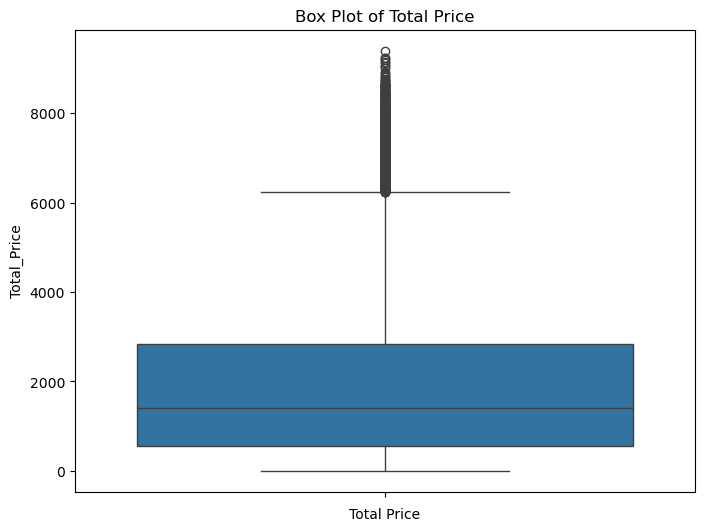

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Total_Price'])
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()

In [32]:
import numpy as np
for column in df.select_dtypes(include=["float", "int"]):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)

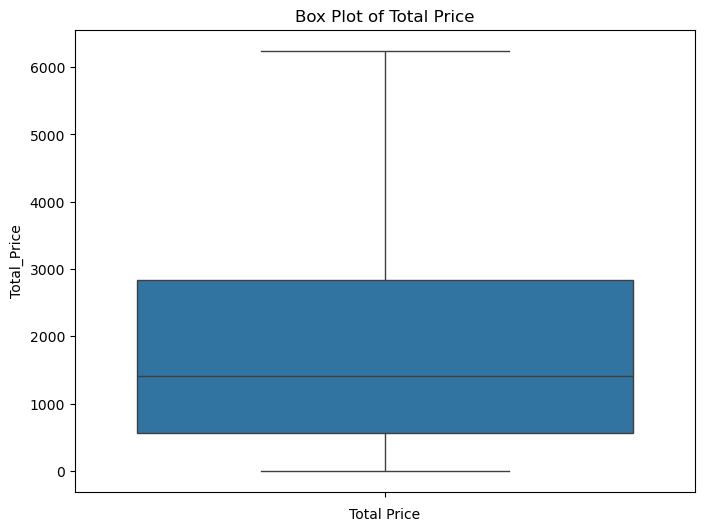

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Total_Price'])
plt.title('Box Plot of Total Price')
plt.xlabel('Total Price')
plt.show()

# Data visualization

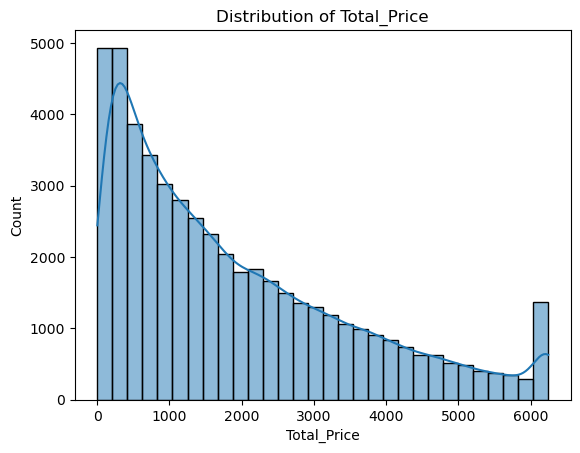

In [38]:
# Distribution of Total_Price
sns.histplot(df['Total_Price'], kde=True, bins=30)
plt.title("Distribution of Total_Price")
plt.show()

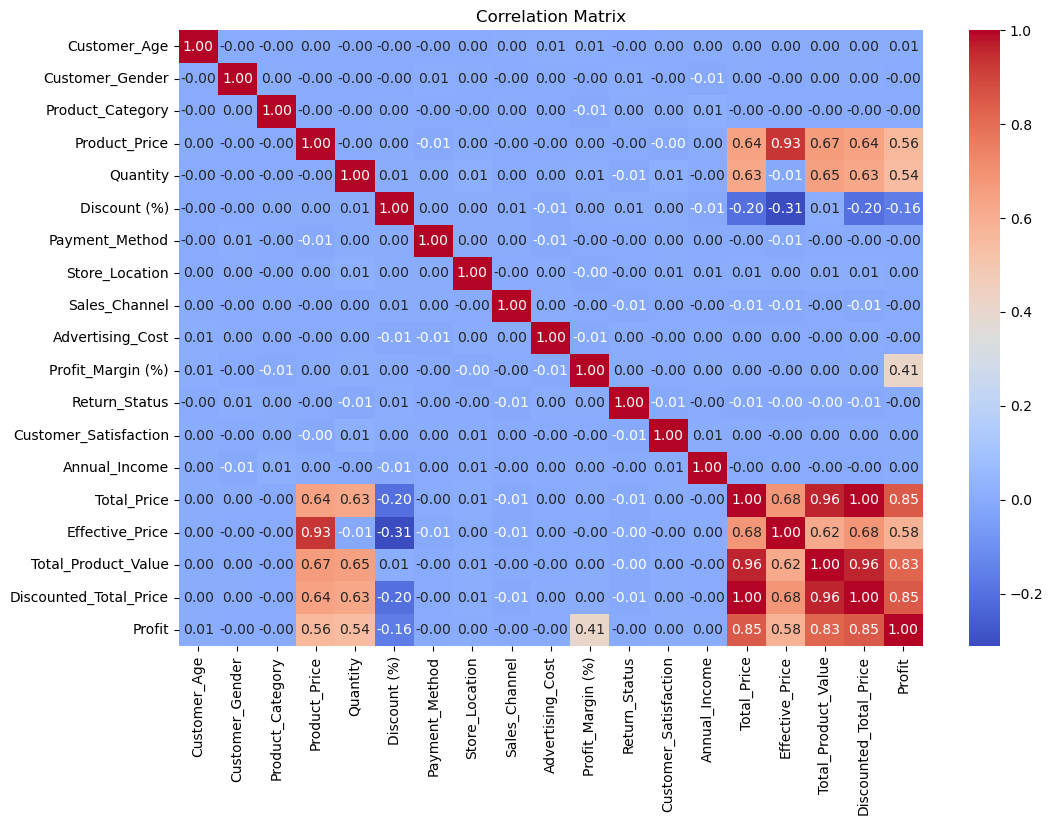

In [39]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

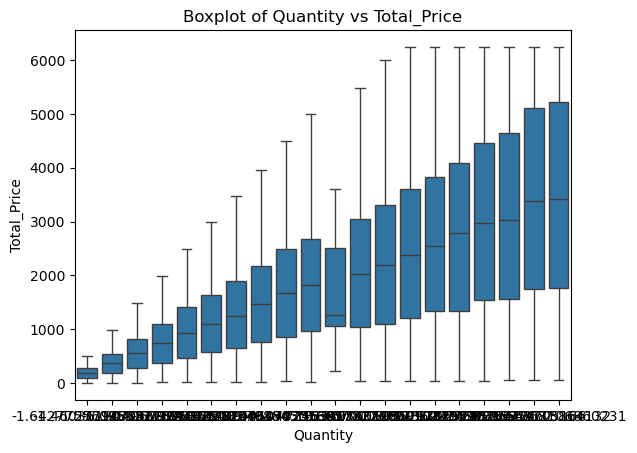

In [41]:
# Boxplot: Quantity vs Total_Price
sns.boxplot(x='Quantity',y='Total_Price',data=df)
plt.title("Boxplot of Quantity vs Total_Price")
plt.show()

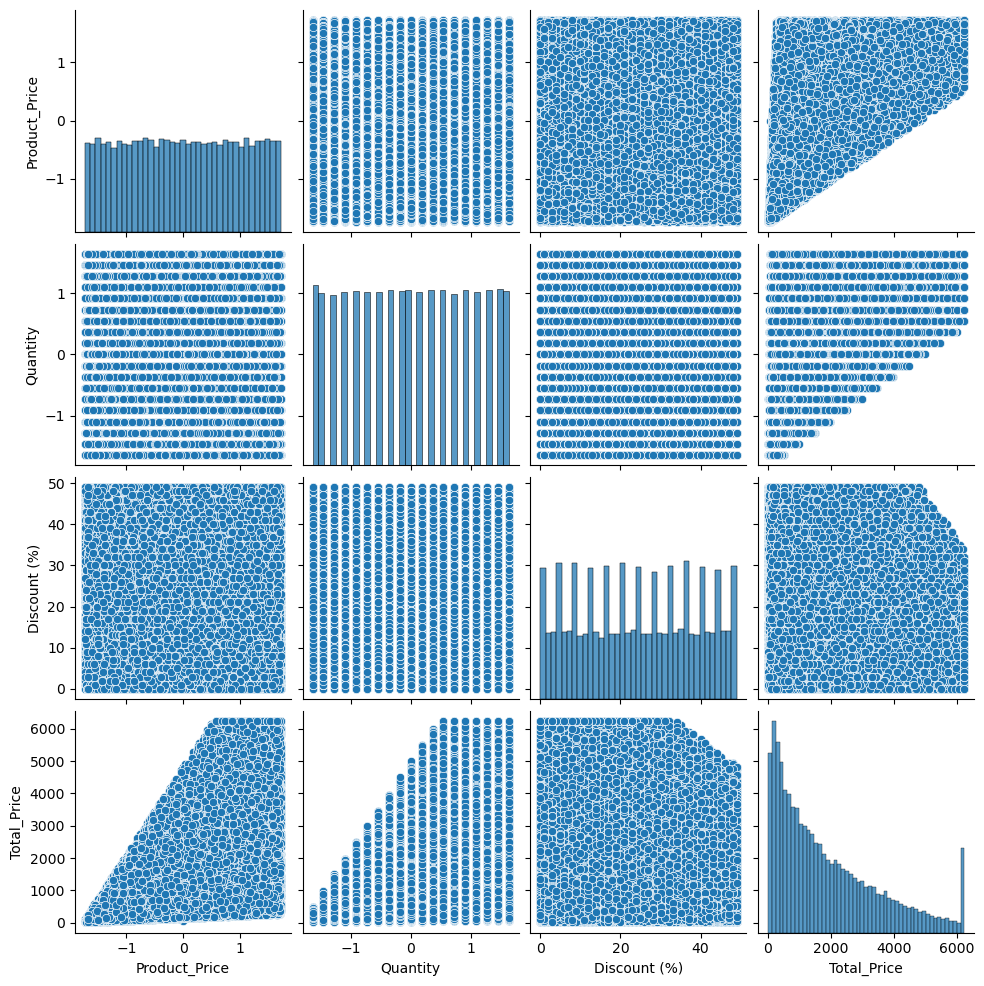

In [42]:
# Pair plot
sns.pairplot(df[['Product_Price','Quantity','Discount (%)','Total_Price']])
plt.show()

# Feature selection

In [35]:
x=df.drop(['Total_Price','Date','Customer_Age','Customer_Gender','Product_Category','Discount (%)','Payment_Method','Store_Location',
           'Sales_Channel','Advertising_Cost','Return_Status','Customer_Satisfaction','Annual_Income'],axis=1)
y=df['Total_Price']

In [47]:
x

,Product_Price,Quantity,Profit_Margin (%),Effective_Price,Total_Product_Value,Discounted_Total_Price,Profit
0,-1.085992,-0.183462,17.0,-0.913933,-0.770305,-0.678475,-0.570291
1,0.023400,1.458267,19.0,-0.365113,0.974840,0.457117,0.545671
2,0.640529,0.911024,14.0,1.028668,1.233522,1.631114,0.966514
3,0.899077,-0.183462,24.0,1.612277,0.422708,0.886632,1.452048
4,1.366646,-1.277947,25.0,2.028565,-0.553412,-0.374503,-0.012309
...,...,...,...,...,...,...,...
49995,1.181409,-1.095533,16.0,0.427170,-0.393370,-0.562280,-0.500638
49996,-0.804710,1.093438,27.0,-0.814668,-0.149585,-0.214825,0.277029
49997,1.425057,-1.095533,13.0,2.254769,-0.328289,-0.059043,-0.261100
49998,0.355539,0.911024,18.0,-0.074947,0.948060,0.491546,0.497463


In [48]:
y

0         766.71
1        2677.96
2        4653.86
3        3400.86
4        1278.31
          ...   
49995     962.27
49996    1547.06
49997    1809.24
49998    2735.91
49999     134.28
Name: Total_Price, Length: 50000, dtype: float64

# Train- test split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train

,Product_Price,Quantity,Profit_Margin (%),Effective_Price,Total_Product_Value,Discounted_Total_Price,Profit
39087,1.376650,-0.913119,24.0,0.680993,-0.131030,-0.331980,0.000646
30893,-0.884876,1.275853,18.0,-0.971374,-0.176066,-0.340760,-0.246013
45278,0.999600,-1.095533,22.0,1.666698,-0.441932,-0.220971,0.042237
16398,0.455502,-0.183462,20.0,0.136415,0.156123,-0.027735,0.143406
13653,0.779177,1.093438,23.0,1.308492,1.542691,2.123660,2.034608
...,...,...,...,...,...,...,...
11284,0.726292,-1.277947,5.0,-0.016162,-0.681695,-0.796772,-0.870932
44732,-1.277175,0.911024,24.0,-1.247107,-0.687357,-0.718802,-0.460071
38158,-1.027511,-1.460361,23.0,-0.897022,-1.082683,-1.030464,-0.836410
860,-0.250888,0.181367,7.0,-0.561402,-0.065399,-0.310296,-0.668465


In [52]:
x_test

,Product_Price,Quantity,Profit_Margin (%),Effective_Price,Total_Product_Value,Discounted_Total_Price,Profit
33553,1.412885,-0.365876,19.0,0.668535,0.518895,0.142387,0.248913
9427,-0.272084,-1.095533,14.0,-0.595065,-0.781609,-0.843757,-0.752946
199,-0.837378,-0.913119,12.0,-0.819846,-0.870261,-0.848558,-0.784615
12447,0.054599,1.093438,17.0,0.220337,0.768528,0.925148,0.782598
39489,-0.355119,-1.095533,24.0,0.080260,-0.803789,-0.657803,-0.387420
...,...,...,...,...,...,...,...
28567,-0.207797,-1.277947,6.0,-0.144818,-0.868822,-0.823341,-0.862107
25079,0.810586,-1.460361,27.0,0.261930,-0.837198,-0.870903,-0.602055
18707,-0.344975,0.181367,10.0,-0.364813,-0.134510,-0.161434,-0.471955
15200,-0.347074,0.363781,28.0,-0.103171,-0.040968,0.143116,0.820018


In [53]:
y_train

39087    1349.88
30893    1335.10
45278    1536.71
16398    1861.94
13653    5482.83
          ...   
11284     567.61
44732     698.84
38158     174.30
860      1386.37
15795     137.63
Name: Total_Price, Length: 40000, dtype: float64

In [54]:
y_test

33553    2148.26
9427      488.54
199       480.46
12447    3465.68
39489     801.50
          ...   
28567     522.90
25079     442.85
18707    1636.92
15200    2149.49
5857      310.17
Name: Total_Price, Length: 10000, dtype: float64

# Model building

# linear regression model

In [66]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [68]:
train_pred=model1.predict(x_train)
test_pred=model1.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: 0.9991895409087551
test_score: 0.99952035706089
MSE(train): 46.325177199611375
MSE(test): 35.29417527609837


# RandomForestRegressor model

In [71]:
model2=RandomForestRegressor(n_estimators=50, random_state=42)
model2.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [73]:
train_pred=model2.predict(x_train)
test_pred=model2.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: 0.9998697444320224
test_score: 0.9996016204860637
MSE(train): 18.57570514225606
MSE(test): 32.1693459411956


# XGBRegressor model

In [76]:
model3=XGBRegressor(n_estimators=50,learning_rate=0.1,max_depth=5,random_state=42)
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
train_pred=model3.predict(x_train)
test_pred=model3.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: 0.9993690972628523
test_score: 0.9994479723052789
MSE(train): 40.6620864939604
MSE(test): 37.672300419009666


# KNN Model

In [81]:
model4=KNeighborsRegressor(n_neighbors=5,weights='distance')
model4.fit(x_train,y_train)

KNeighborsRegressor(weights='distance')

In [83]:
train_pred=model4.predict(x_train)
test_pred=model4.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: 0.9999994409135988
test_score: 0.9980260345366836
MSE(train): 1.217213613134523
MSE(test): 71.38171098125456


# Decision tree

In [86]:
model5=DecisionTreeRegressor(max_depth=5,random_state=42)
model5.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [88]:
train_pred=model5.predict(x_train)
test_pred=model5.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: 0.9981960181537111
test_score: 0.9984829517470013
MSE(train): 69.0799735212719
MSE(test): 62.7639160915024


# SVR

In [130]:
from sklearn.svm import SVR
model6=SVR()
model6.fit(x_train,y_train)

SVR()

In [135]:
train_pred=model6.predict(x_train)
test_pred=model6.predict(x_test)
print('train_score:',r2_score(train_pred,y_train))
print('test_score:',r2_score(test_pred,y_test))
print('MSE(train):',np.sqrt(mean_squared_error(train_pred,y_train)))
print('MSE(test):',np.sqrt(mean_squared_error(test_pred,y_test)))

train_score: -2.931790727848742
test_score: -2.8730535474751178
MSE(train): 1132.5473703397465
MSE(test): 1133.4333304888755


# Hyperparameter Tuning

# Ridge

In [92]:
from sklearn.linear_model import Ridge
ridge=Ridge()
param={'alpha': [0.01,0.1,1,10,100]}

#gridsearch cv
from sklearn.model_selection import GridSearchCV
gscv=GridSearchCV(ridge,param,cv=5)
gscv.fit(x_train,y_train)

print("Best Ridge Parameters:", gscv.best_params_)
print("Best Ridge Score:", gscv.best_score_)

Best Ridge Parameters: {'alpha': 0.01}
Best Ridge Score: 0.9991907383526201


# RandomForest

In [95]:
from sklearn.model_selection import GridSearchCV
Rf=RandomForestRegressor(random_state=42)

params={'n_estimators':[5,10,15],
    'max_depth':[2,3,4],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,2,4]}
    
gscv=GridSearchCV(Rf,params,cv=3)
gscv.fit(x_train,y_train)

print("Best Rf Parameters:", gscv.best_params_)
print("Best Rf Score:", gscv.best_score_)

Best Rf Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Rf Score: 0.9960531365049051


# XGBRegressor

In [98]:
xgb = XGBRegressor(random_state=42)

param={
    'n_estimators': [10,20,30],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'max_depth': [3,5,7,10],
    'alpha': [0,0.1,1],
    'lambda': [1,1.5,2]}

gscv=GridSearchCV(estimator=xgb,param_grid=param,cv=3)
gscv.fit(x_train,y_train)

print("Best XGBR Parameters:", gscv.best_params_)
print("Best XGBR Score:", gscv.best_score_)

Best XGBR Parameters: {'alpha': 0, 'lambda': 2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 30}
Best XGBR Score: 0.9992877495443082


# KNN

In [101]:
knn=KNeighborsRegressor()

params={ 'n_neighbors':[5,10,15],  # Odd values for n_neighbors
        'weights':['uniform','distance'],
        'metric': ['euclidean', 'manhattan']}

gscv=GridSearchCV(knn,params,cv=5)
gscv.fit(x_train, y_train)

print("Best KNN Parameters:", gscv.best_params_)
print("Best KNN Score:", gscv.best_score_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best KNN Score: 0.9979156117782082


# Decision-tree

In [104]:
dtr=DecisionTreeRegressor()

params={
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state':[42]}

gscv=GridSearchCV(dtr,params,cv=5,return_train_score=True)
gscv.fit(x_train, y_train)

print("Best Decision-tree Parameters:", gscv.best_params_)
print("Best Decision-tree Score:", gscv.best_score_)

Best Decision-tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
Best Decision-tree Score: 0.9994383269644782


# Finding best model

In [117]:
from sklearn.model_selection import KFold
x=df.drop(['Total_Price','Customer_Age','Customer_Gender','Product_Category','Discount (%)','Payment_Method','Store_Location',
           'Sales_Channel','Advertising_Cost','Return_Status','Customer_Satisfaction','Annual_Income'],axis=1)
y=df['Total_Price']

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
linear_train_scores = []
linear_test_scores = []
rf_train_scores = []
rf_test_scores = []
xgb_train_scores = []
xgb_test_scores = []

# Define a function to calculate and return a chosen metric
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Return training and testing r2 score
    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)  

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get the scores for each model
    linear_train, linear_test = get_score(LinearRegression(), x_train, x_test, y_train, y_test)
    rf_train, rf_test = get_score(RandomForestRegressor(random_state=34), x_train, x_test, y_train, y_test)
    xgb_train, xgb_test = get_score(XGBRegressor(random_state=34), x_train, x_test, y_train, y_test)

    # Append training and test scores for each model
    linear_train_scores.append(linear_train)
    linear_test_scores.append(linear_test)
    
    rf_train_scores.append(rf_train)
    rf_test_scores.append(rf_test)
    
    xgb_train_scores.append(xgb_train)
    xgb_test_scores.append(xgb_test)
    

# Print the results for training and test scores
print("Linear Regression - Training Scores:", linear_train_scores)
print("Linear Regression - Test Scores:", linear_test_scores)

print("Random Forest Regressor - Training Scores:", rf_train_scores)
print("Random Forest Regressor - Test Scores:", rf_test_scores)

print("XGBoost Regressor - Training Scores:", xgb_train_scores)
print("XGBoost Regressor - Test Scores:", xgb_test_scores)


# Calculate the average and standard deviation of training and test scores for each model
def print_model_stats(model_name, train_scores, test_scores):
    print(f"\n{model_name} - Average Training Score:", round(np.mean(train_scores), 4))
    print(f"{model_name} - Average Test Score:", round(np.mean(test_scores), 4))
    print(f"{model_name} - Training Score Standard Deviation:", round(np.std(train_scores), 4))
    print(f"{model_name} - Test Score Standard Deviation:", round(np.std(test_scores), 4))

# Print model performance statistics
print_model_stats("Linear Regression", linear_train_scores, linear_test_scores)
print_model_stats("Random Forest", rf_train_scores, rf_test_scores)
print_model_stats("XGBoost", xgb_train_scores, xgb_test_scores)

Linear Regression - Training Scores: [0.9991901972207796, 0.9993269594824334, 0.9993250282973773, 0.9992372599731122, 0.9991966923044656]
Linear Regression - Test Scores: [0.9995205839988338, 0.9989682457065765, 0.9989672615611354, 0.9993241825930202, 0.9994868540948096]
Random Forest Regressor - Training Scores: [0.9998933870203912, 0.9999114601000968, 0.9999022639920851, 0.9998882587865356, 0.9999031266844625]
Random Forest Regressor - Test Scores: [0.9995850433049782, 0.99876456669285, 0.9990197340754601, 0.9994739822447037, 0.9995054119380689]
XGBoost Regressor - Training Scores: [0.9999334525966638, 0.9999461386613651, 0.9999214699923713, 0.9999009918216825, 0.9999051856573337]
XGBoost Regressor - Test Scores: [0.9995875498985691, 0.9981882727158736, 0.9989604825196197, 0.9994999942093064, 0.9994004392169387]

Linear Regression - Average Training Score: 0.9993
Linear Regression - Average Test Score: 0.9993
Linear Regression - Training Score Standard Deviation: 0.0001
Linear Regres

In [114]:

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores for Decision Tree and KNN
dt_train_scores = []
dt_test_scores = []
knn_train_scores = []
knn_test_scores = []

def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Return training and testing r2 score
    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)  

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get the scores for Decision Tree
    dt_train, dt_test = get_score(DecisionTreeRegressor(random_state=34), x_train, x_test, y_train, y_test)
    dt_train_scores.append(dt_train)
    dt_test_scores.append(dt_test)
    
    # Get the scores for KNN Regressor
    knn_train, knn_test = get_score(KNeighborsRegressor(), x_train, x_test, y_train, y_test)
    knn_train_scores.append(knn_train)
    knn_test_scores.append(knn_test)

# Print the results for Decision Tree and KNN
print("Decision Tree Regressor - Training Scores:", dt_train_scores)
print("Decision Tree Regressor - Test Scores:", dt_test_scores)

print("KNN Regressor - Training Scores:", knn_train_scores)
print("KNN Regressor - Test Scores:", knn_test_scores)

def print_model_stats(model_name, train_scores, test_scores):
    print(f"\n{model_name} - Average Training Score:", round(np.mean(train_scores), 4))
    print(f"{model_name} - Average Test Score:", round(np.mean(test_scores), 4))
    print(f"{model_name} - Training Score Standard Deviation:", round(np.std(train_scores), 4))
    print(f"{model_name} - Test Score Standard Deviation:", round(np.std(test_scores), 4))


# Calculate and print the statistics for Decision Tree and KNN
print_model_stats("Decision Tree", dt_train_scores, dt_test_scores)
print_model_stats("KNN", knn_train_scores, knn_test_scores)


Decision Tree Regressor - Training Scores: [0.9999994409139115, 0.9999994385437783, 0.9999869858005331, 0.9999873810318106, 0.9999874440341774]
Decision Tree Regressor - Test Scores: [0.9986055914519449, 0.9983221543941775, 0.9983391459851343, 0.9994330293996482, 0.9992387351156568]
KNN Regressor - Training Scores: [0.9983984392875646, 0.9984367330089023, 0.998482664149703, 0.9983885688426298, 0.9984024142215538]
KNN Regressor - Test Scores: [0.9977336127472568, 0.9972450221799648, 0.9974167693679524, 0.9976597735570276, 0.9977763005992489]

Decision Tree - Average Training Score: 1.0
Decision Tree - Average Test Score: 0.9988
Decision Tree - Training Score Standard Deviation: 0.0
Decision Tree - Test Score Standard Deviation: 0.0005

KNN - Average Training Score: 0.9984
KNN - Average Test Score: 0.9976
KNN - Training Score Standard Deviation: 0.0
KNN - Test Score Standard Deviation: 0.0002


In [151]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Evaluate models
model_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Display results
results_df = pd.DataFrame(model_results).T
print("Model Performance:")
print(results_df)

# Identify the best model based on RMSE
best_model_name = results_df["RMSE"].idxmin()
print(f"\nBest Model: {best_model_name}")
print(f"Performance:\n{results_df.loc[best_model_name]}")

Model Performance:
                        RMSE        MAE        R2
Linear Regression  36.965680   2.375115  0.999487
Random Forest      34.848228   0.878707  0.999544
KNN                76.951362  50.170391  0.997776
Decision Tree      45.024114   1.075409  0.999239
XGBoost            39.957185   7.048143  0.999400

Best Model: Random Forest
Performance:
RMSE    34.848228
MAE      0.878707
R2       0.999544
Name: Random Forest, dtype: float64


In [155]:
import joblib
joblib.dump(model2,'Project')

['Project']

In [158]:
joblib_reload=joblib.load('Project')

In [160]:
joblib_reload

RandomForestRegressor(n_estimators=50, random_state=42)